In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
'''
[문제01]
'''

'\n[문제01]\n'

In [4]:
from sklearn.tree import DecisionTreeRegressor

In [5]:
'''
[문제02]
'''

'\n[문제02]\n'

In [8]:
yield_df = pd.read_csv("data/4_manufacturing_yield.csv")
yield_df.describe()


,temp_sensor_1,pressure_sensor,humidity,vibration_sensor,processing_time_sec,power_consumption,operator_experience_years,yield_percentage
count,1953.000000,1929.000000,1933.000000,2000.000000,1937.000000,2000.000000,2000.00000,2000.000000
mean,99.956001,50.009907,50.068148,0.997867,120.214042,198.165180,5.58350,94.420420
std,5.103861,2.045517,11.710720,0.194692,9.808000,21.852483,2.83179,1.113597
min,82.880000,42.830000,30.010000,0.343300,85.400000,121.530000,1.00000,91.200000
25%,96.580000,48.590000,39.990000,0.862225,113.700000,183.797500,3.00000,93.590000
50%,100.020000,50.030000,49.970000,1.009700,120.100000,198.200000,6.00000,94.440000
75%,103.380000,51.400000,60.350000,1.125175,126.700000,212.747500,8.00000,95.262500
max,121.310000,58.440000,70.000000,1.604000,158.600000,263.580000,10.00000,97.430000


In [10]:
답안02 = 3

In [11]:
'''
[문제03]
'''

'\n[문제03]\n'

<Axes: xlabel='processing_time_sec', ylabel='yield_percentage'>

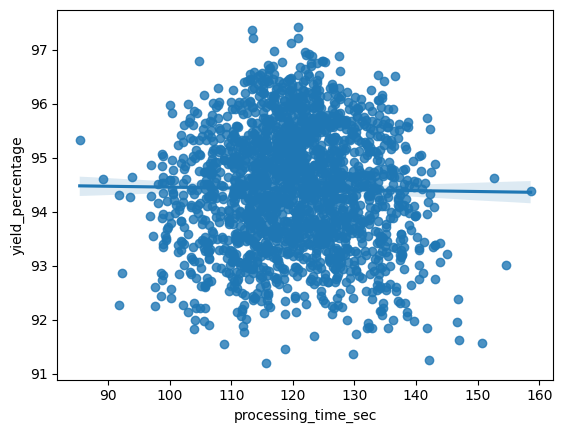

In [12]:
sns.regplot(data=yield_df, x='processing_time_sec', y='yield_percentage')

In [13]:
'''
[문제04]
'''

'\n[문제04]\n'

In [16]:
cross_table = pd.crosstab(yield_df['production_line'],yield_df['material_type'])
print(cross_table)

material_type    Type-X  Type-Y  Type-Z
production_line                        
Line-A              357     298     294
Line-B              363     347     341


In [22]:
'''
[문제05]
'''

'\n[문제05]\n'

In [23]:
sensor_means = yield_df.groupby('production_line')[['temp_sensor_1','pressure_sensor','humidity','vibration_sensor']].mean()
print(sensor_means)


                 temp_sensor_1  pressure_sensor   humidity  vibration_sensor
production_line                                                             
Line-A               99.696071        49.992863  49.928922          0.996887
Line-B              100.191816        50.025064  50.196706          0.998752


In [24]:
'''
[문제06]
'''

'\n[문제06]\n'

In [26]:
yield_df.isnull().sum()

production_line               0
material_type                 0
temp_sensor_1                47
pressure_sensor              71
humidity                     67
vibration_sensor              0
processing_time_sec          63
power_consumption             0
operator_experience_years     0
yield_percentage              0
dtype: int64

In [31]:
yield_pre = yield_df.copy()
null_col = ['temp_sensor_1','pressure_sensor','humidity','processing_time_sec']
for col in null_col:
    mean_val = yield_pre[col].mean()
    yield_pre[col].fillna(mean_val, inplace=True)

yield_pre.isnull().sum()

production_line              0
material_type                0
temp_sensor_1                0
pressure_sensor              0
humidity                     0
vibration_sensor             0
processing_time_sec          0
power_consumption            0
operator_experience_years    0
yield_percentage             0
dtype: int64

In [32]:
'''
[문제07]
'''

'\n[문제07]\n'

In [35]:
yield_pre.head()

,production_line,material_type,temp_sensor_1,pressure_sensor,humidity,vibration_sensor,processing_time_sec,power_consumption,operator_experience_years,yield_percentage
0,Line-B,Type-X,94.97,50.93,57.93,0.5828,116.700000,233.75,3.0,94.02
1,Line-A,Type-X,99.09,50.37,51.29,0.9396,120.214042,199.01,6.0,94.82
2,Line-A,Type-X,101.39,51.77,67.43,0.9908,118.600000,207.59,9.0,96.08
3,Line-B,Type-Y,100.32,49.27,37.91,1.3588,115.000000,213.31,10.0,96.57
4,Line-A,Type-X,105.25,54.07,45.86,0.9597,121.000000,192.11,9.0,94.80


In [39]:
yield_encoded = pd.get_dummies(yield_pre, columns=['production_line','material_type'], dtype=int)
yield_encoded.head()

,temp_sensor_1,pressure_sensor,humidity,vibration_sensor,processing_time_sec,power_consumption,operator_experience_years,yield_percentage,production_line_Line-A,production_line_Line-B,material_type_Type-X,material_type_Type-Y,material_type_Type-Z
0,94.97,50.93,57.93,0.5828,116.700000,233.75,3.0,94.02,0,1,1,0,0
1,99.09,50.37,51.29,0.9396,120.214042,199.01,6.0,94.82,1,0,1,0,0
2,101.39,51.77,67.43,0.9908,118.600000,207.59,9.0,96.08,1,0,1,0,0
3,100.32,49.27,37.91,1.3588,115.000000,213.31,10.0,96.57,0,1,0,1,0
4,105.25,54.07,45.86,0.9597,121.000000,192.11,9.0,94.80,1,0,1,0,0


In [40]:
'''
[문제08]
'''

'\n[문제08]\n'

In [44]:
from sklearn.model_selection import train_test_split

X = yield_encoded.drop(['yield_percentage'], axis=1)
y = yield_encoded['yield_percentage']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2024)

print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(1500, 12) (500, 12)
(1500,) (500,)


In [45]:
'''
[문제09]
'''

'\n[문제09]\n'

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [53]:
'''
[문제10]
'''

'\n[문제10]\n'

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(max_depth=5)